In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2
%matplotlib inline

In [2]:
DATADIR = "galaxy_photos"
CATEGORIES = ["elliptical","spiral"]
IMAGE_SIZE = 100

In [3]:
data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                img_rot = cv2.rotate(img_array,cv2.ROTATE_90_CLOCKWISE)
                img_flip = cv2.rotate(img_array,cv2.ROTATE_180)                
                data.append([img_array,class_num])
                data.append([img_rot,class_num])
                data.append([img_flip,class_num])
            except Exception as e:
                pass

create_data()
print("Done")

Done


In [4]:
len(data)

1545

In [5]:
import random
random.shuffle(data)

elliptical


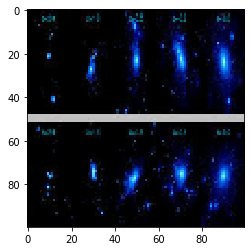

In [6]:
plt.imshow(data[0][0])
print(CATEGORIES[data[0][1]])

In [7]:
test_size = 0.25

train_data = data[:-int(test_size * len(data))]
test_data = data[-int(test_size * len(data)):]

print("Training Size:",len(train_data))
print("Test data Size:",len(test_data))

Training Size: 1159
Test data Size: 386


In [8]:
train_images = []
train_labels = []

for image, label in train_data:
    train_images.append(image)
    train_labels.append(label)

train_images = np.array(train_images).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,3)
train_labels = np.array(train_labels)

spiral


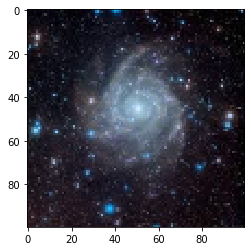

In [9]:
plt.imshow(train_images[12].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[train_labels[12]])

In [10]:
test_images = []
test_labels = []

for image, label in test_data:
    test_images.append(image)
    test_labels.append(label)

test_images = np.array(test_images).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,3)
test_labels = np.array(test_labels)

elliptical


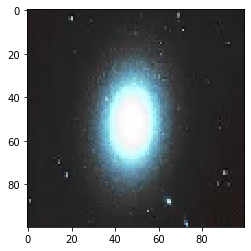

In [11]:
plt.imshow(test_images[100].reshape(IMAGE_SIZE,IMAGE_SIZE,3))
print(CATEGORIES[test_labels[100]])

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
import pickle

training_images_pickle = open("training_images.pickle","wb")
pickle.dump(train_images, training_images_pickle)
training_images_pickle.close()

training_labels_pickle = open("training_labels.pickle","wb")
pickle.dump(train_labels, training_labels_pickle)
training_labels_pickle.close()

test_images_pickle = open("test_images.pickle","wb")
pickle.dump(test_images, test_images_pickle)
test_images_pickle.close()

test_labels_pickle = open("test_labels.pickle","wb")
pickle.dump(test_labels, test_labels_pickle)
test_labels_pickle.close()